<a href="https://colab.research.google.com/github/masterinfo/COURS_ELEARNING/blob/master/vgg16_catdogs_comparatifs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

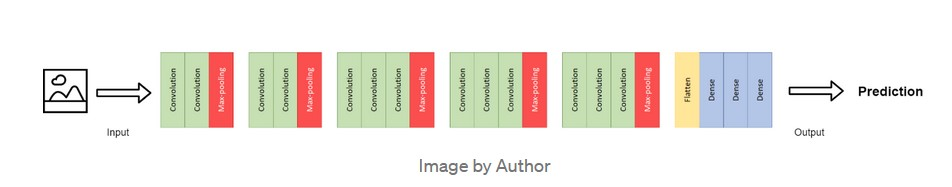

In [2]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten,Dropout,Rescaling,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
from matplotlib import pyplot as plt

import vgg16 et imagenet

In [3]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape= (224,224,3))
base_model.trainable = False ## Not trainable weights

58900480/58889256 [==============================] - 1s 0us/step


In [4]:
# base_model.summary()

**Recup data from googleDrive**

In [5]:
rep_training='/content/drive/My Drive/dataset/training_set/'
trdata = ImageDataGenerator(rescale=1. / 255,horizontal_flip=True, vertical_flip=True,rotation_range=30, zoom_range=0.1, fill_mode='nearest')
traindata = trdata.flow_from_directory(directory=rep_training,target_size=(224,224),shuffle = False)

Found 8000 images belonging to 2 classes.


In [6]:
rep_test='/content/drive/My Drive/dataset/test_set/'
tsdata = ImageDataGenerator(rescale=1. / 255)
testdata = tsdata.flow_from_directory(directory=rep_test, target_size=(224,224),shuffle = False)

Found 2000 images belonging to 2 classes.


**Fine tuning **

In [7]:
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dropout

In [8]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

rep='/content/drive/My Drive/'
def check_early_compil_model(model_var, file_var, lr_var):
  checkpoint = ModelCheckpoint(rep+file_var, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
  early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
  opt = Adam(learning_rate=lr_var)
  model_var.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

 
  hist_var = model_var.fit(traindata,steps_per_epoch=100,  validation_data= testdata, validation_steps=10,epochs=150,callbacks=[checkpoint,early])
  return hist_var

In [9]:
import matplotlib.pyplot as plt
def affich_hist(hist_var):
    plt.plot(hist_var.history["accuracy"])
    plt.plot(hist_var.history['val_accuracy'])
    plt.plot(hist_var.history['loss'])
    plt.plot(hist_var.history['val_loss'])
    plt.title("model accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
    plt.show()

**model1**

In [10]:
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dropout_layer_1=layers.Dropout(0.2)
dense_layer_2 = layers.Dense(20, activation='relu')
dropout_layer_2=layers.Dropout(0.2)
prediction_layer = layers.Dense(2, activation='softmax')

model1  = models.Sequential([
    base_model, 
    flatten_layer,
    dense_layer_1,
    dropout_layer_1,
    dense_layer_2,
    dropout_layer_2,
    prediction_layer
])
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 50)                1254450   
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                1020      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 4

In [ ]:
hist=check_early_compil_model(model1,"vgg16_model1_wil.h5",0.0001)#model_var, file_var, lr_var,hist_var

Epoch 1/150
100/100 [==============================] - ETA: 0s - loss: 0.7292 - accuracy: 0.4922
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to /content/drive/My Drive/vgg16_model1_wil.h5
100/100 [==============================] - 638s 6s/step - loss: 0.7292 - accuracy: 0.4922 - val_loss: 0.6624 - val_accuracy: 1.0000
Epoch 2/150
100/100 [==============================] - ETA: 0s - loss: 0.6979 - accuracy: 0.5231
Epoch 2: val_accuracy did not improve from 1.00000
100/100 [==============================] - 340s 3s/step - loss: 0.6979 - accuracy: 0.5231 - val_loss: 0.7519 - val_accuracy: 0.0375
Epoch 3/150
100/100 [==============================] - ETA: 0s - loss: 0.6712 - accuracy: 0.6047
Epoch 3: val_accuracy did not improve from 1.00000
100/100 [==============================] - 214s 2s/step - loss: 0.6712 - accuracy: 0.6047 - val_loss: 1.2025 - val_accuracy: 0.0219
Epoch 4/150
100/100 [==============================] - ETA: 0s - loss: 0.6165 - accuracy: 0.6466
E

In [ ]:
affich_hist(hist)

Model2

In [ ]:
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(32, activation='relu')
dropout_layer_1=layers.Dropout(0.1)
dense_layer_2 = layers.Dense(64, activation='relu')
dropout_layer_2=layers.Dropout(0.1)
prediction_layer = layers.Dense(2, activation='softmax')

model2  = models.Sequential([
    base_model, 
    flatten_layer,
    dense_layer_1,
    dropout_layer_1,
    dense_layer_2,
    dropout_layer_2,
    prediction_layer
])

In [ ]:
hist2=check_early_compil_model(model2,"vgg16_model2_wil.h5",0.0001)#model_var, file_var, lr_var,hist_var

In [ ]:
affich_hist(hist2)

Model3

In [ ]:
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(100, activation='relu')
dropout_layer_1=layers.Dropout(0.4)
dense_layer_2 = layers.Dense(64, activation='relu')
dropout_layer_2=layers.Dropout(0.1)
prediction_layer = layers.Dense(2, activation='softmax')

model3  = models.Sequential([
    base_model, 
    flatten_layer,
    dense_layer_1,
    dropout_layer_1,
    dense_layer_2,
    dropout_layer_2,
    prediction_layer
])

In [ ]:
hist3=check_early_compil_model(model3,"vgg16_model3_wil.h5",0.0001)#model_var, file_var, lr_var,hist_var

In [ ]:
affich_hist(hist3)